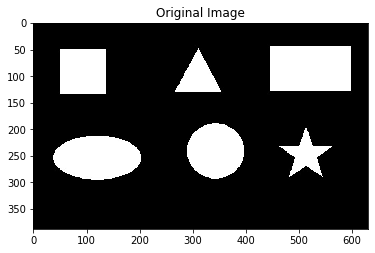

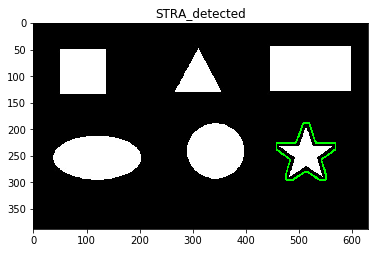

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("shapes.jpg")
plt.imshow(img, "gray"  ,vmin=0 , vmax=255)
plt.title("Original Image")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray,(13,13),5)
cns,_ = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) # extracting contours 


area=[]
skin=[]
sikin_area=[]
solid=[]

for i in range(len(cns)):
    area.append(0)
    skin.append(0)
    sikin_area.append(0)
    solid.append(0)
    area[i]=cv2.contourArea(cns[i])
    skin[i] = cv2.convexHull(cns[i])
    sikin_area[i] = cv2.contourArea(skin[i])
    solid[i] = float(area[i])/sikin_area[i]

STRA =np.argmin(np.array(solid))        
output = cv2.drawContours(img, cns, STRA , (0, 255, 0), 2)
plt.figure() 
plt.imshow(output, "gray")
plt.title("STRA_detected")
plt.show()